In [ ]:
import numpy as np
from queue import PriorityQueue
import random
import itertools
import matplotlib.pyplot as plt

class PuzzleState:
    goal_state = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

    def __init__(self, state, parent=None, action=None, depth=0):
        self.state = np.array(state)
        self.parent = parent
        self.action = action
        self.depth = depth
        self.heuristic_cost = self.calculate_manhattan_distance()
        self.total_cost = self.depth + self.heuristic_cost

    def calculate_manhattan_distance(self):
        total_distance = 0
        for num in range(1, 9):
            position = np.argwhere(self.state == num)[0]
            goal_position = np.argwhere(self.goal_state == num)[0]
            total_distance += abs(position[0] - goal_position[0]) + abs(position[1]  - goal_position[1])
        return total_distance

    def is_goal(self):
        return np.array_equal(self.state, self.goal_state)

    def possible_moves(self):
        zero_pos = tuple(np.argwhere(self.state == 0)[0])
        moves = []
        if zero_pos[0] > 0: moves.append("Up")
        if zero_pos[0] < 2: moves.append("Down")
        if zero_pos[1] > 0: moves.append("Left")
        if zero_pos[1] < 2: moves.append("Right")
        return moves

    def generate_successor(self, move):
        zero_pos = tuple(np.argwhere(self.state == 0)[0])
        new_state = np.copy(self.state)
        if move == "Up":
            swap_pos = (zero_pos[0] - 1, zero_pos[1])
        elif move == "Down":
            swap_pos = (zero_pos[0] + 1, zero_pos[1])
        elif move == "Left":
            swap_pos = (zero_pos[0], zero_pos[1] - 1)
        else:  # Right
            swap_pos = (zero_pos[0], zero_pos[1] + 1)
        new_state[zero_pos] \
        , new_state[swap_pos] = new_state[swap_pos], new_state[zero_pos]
        return PuzzleState(new_state.tolist(), self, move, self.depth + 1)



def a_star_search(initial_state):
    open_set = PriorityQueue()
    counter = itertools.count()
    start_state = PuzzleState(initial_state)
    open_set.put((start_state.total_cost, next(counter), start_state))
    visited = set()

    while not open_set.empty():
        current_cost, _, current_state = open_set.get()

        if current_state.is_goal():
            return current_state

        visited.add(tuple(map(tuple, current_state.state)))

        for move in current_state.possible_moves():
            successor = current_state.generate_successor(move)
            if tuple(map(tuple, successor.state)) not in visited:
                open_set.put((successor.total_cost, next(counter), successor))

    return None

def print_solution(solution):
    path = []
    total_cost = solution.total_cost
    while solution.parent:
        path.append(solution.action)
        solution = solution.parent
    path.reverse()
    return path, total_cost



In [ ]:
def plot_solution(solution):
    states = [solution.state]
    while solution.parent:
        solution = solution.parent
        states.append(solution.state)
    states.reverse()

    fig, axs = plt.subplots(1, len(states), figsize=(len(states)*2, 2))
    for i, state in enumerate(states):
        axs[i].matshow(state, cmap='tab20c')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        for (j, k), val in np.ndenumerate(state):
            axs[i].text(k, j, f'{val}', ha='center', va='center', color='black')
    plt.show()


Solution found with the following moves: ['Right', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Right', 'Down']
Total cost (depth + heuristic): 9


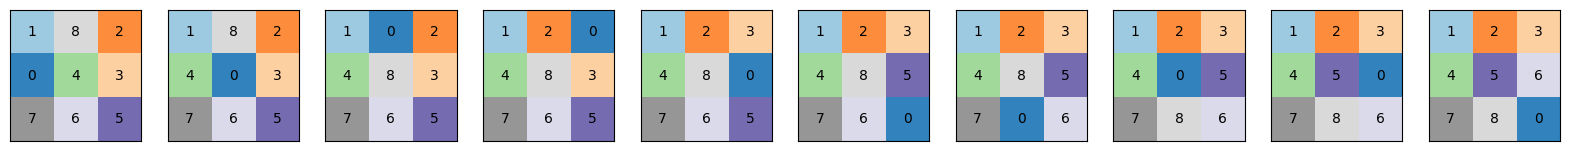

In [ ]:
if __name__ == "__main__":
    initial_state = [[1, 8, 2], [0, 4, 3], [7, 6, 5]]

    solution = a_star_search(initial_state)

    if solution:
        actions, total_cost = print_solution(solution)
        print("Solution found with the following moves:", actions)
        print("Total cost (depth + heuristic):", total_cost)
        plot_solution(solution)
    else:
        print("No solution found.")


In [ ]:
def shuffle_state(state, moves=100):
    current_state = PuzzleState(state)
    for _ in range(moves):
        move = random.choice(current_state.possible_moves())
        current_state = current_state.generate_successor(move)
    return current_state.state

def generate_random_states(n=1000):
    random_states = [shuffle_state(PuzzleState.goal_state, 100) \
                     for _ in range(n)]
    return random_states


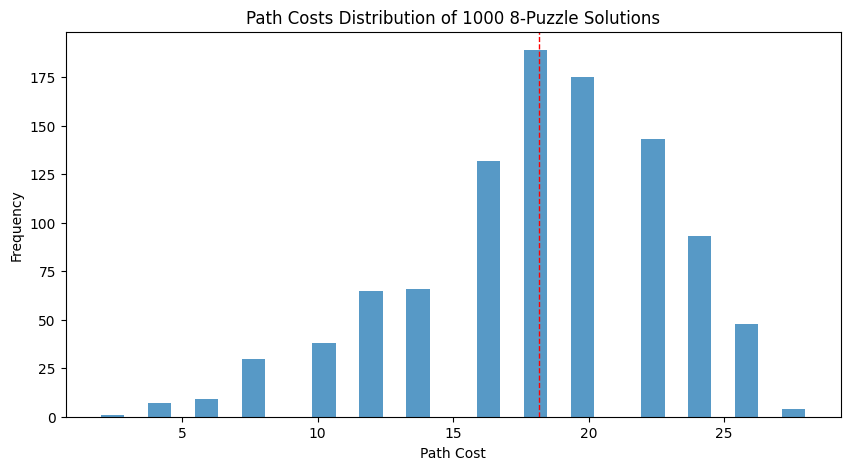

In [ ]:
def solve_and_analyze_states(states):
    path_costs = []
    for state in states:
        solution = a_star_search(state)
        if solution:
            _, total_cost = print_solution(solution)
            path_costs.append(total_cost)
    average_cost = sum(path_costs) / len(path_costs)
    return average_cost, path_costs

random_states = generate_random_states(1000)
average_cost, path_costs = solve_and_analyze_states(random_states)

def visualize_results(average_cost, path_costs):
    plt.figure(figsize=(10, 5))
    plt.hist(path_costs, bins=30, alpha=0.75)
    plt.axvline(average_cost, color='red', linestyle='dashed', linewidth=1)
    plt.title('Path Costs Distribution of 1000 8-Puzzle Solutions')
    plt.xlabel('Path Cost')
    plt.ylabel('Frequency')
    plt.show()

visualize_results(average_cost, path_costs)
